In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.cm as cm

In [2]:
digits = load_digits()
data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [3]:
pca = PCA(n_components=10)
data_r = pca.fit(data).transform(data)

In [4]:
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
print('sum of explained variance (first two components): %s' % str(sum(pca.explained_variance_ratio_)))

explained variance ratio (first two components): [0.14890594 0.13618771 0.11794594 0.08409979 0.05782411 0.04916907
 0.04315984 0.03661344 0.03353238 0.03078589]
sum of explained variance (first two components): 0.7382241172560536


In [5]:
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

No handles with labels found to put in legend.


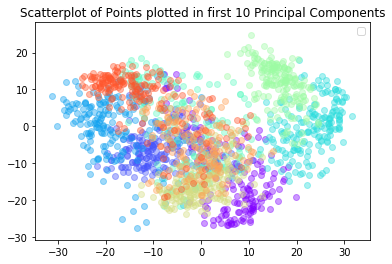

In [6]:
plt.figure()
colors = cm.rainbow(np.linspace(0,1,len(ys)))

for c, i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], labels):
    plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c=c, alpha=0.4)
plt.legend()
plt.title('Scatterplot of Points plotted in first 10 Principal Components')
plt.show()

In [37]:
from time import time
from sklearn.cluster import KMeans
from sklearn import metrics

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

np.random.seed()
sample_size = 300

In [44]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('9 %s %.2fs %i %.3f %.3f %.3f %.3f %.3f %.3f' % (name, (time() -t0), estimator.inertia_, 
                                                           metrics.homogeneity_score(labels, estimator.labels_),
                                                           metrics.completeness_score(labels, estimator.labels_),
                                                          metrics.v_measure_score(labels, estimator.labels_),
                                                          metrics.adjusted_rand_score(labels, estimator.labels_),
                                                          metrics.silhouette_score(labels, estimator.labels_,
                                                          metric = 'euclidean', sample_size = sample_size)))

In [36]:
print('n_digits: %d, \t n_samples: %d'%(n_digits, n_features))
print(79 * '_')
print('% 9s'%'init'' time inertia homo compl v-meas ARI AMI silhouette')
bench_k_means(KMeans(init='k-means++', n_clusters = n_digits, n_init = 10), name='k-means++', data = data)
print(79 * '_')

n_digits: 10, 	 n_samples: 64
_______________________________________________________________________________
init time inertia homo compl v-meas ARI AMI silhouette


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2 ... 8 9 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
print('n_digits: %d, \t n_samples: %d'%(n_digits, n_features))
print(79 * '_')
print('% 9s'%'init'' time inertia homo compl v-meas ARI AMI silhouette')
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters = 10), name='PCA-based', data = data)
print(79 * '_')

n_digits: 10, 	 n_samples: 64
_______________________________________________________________________________
init time inertia homo compl v-meas ARI AMI silhouette


A:\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2 ... 8 9 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.